<a href="https://colab.research.google.com/github/vishal-verma27/How-To-Build-Email-Spam-Classification-Model-With-99-Accuracy/blob/main/How_To_Build_Email_Spam_Classification_Model_With_99_Accuracy_Multinomial_Naive_Bayes_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Context**
**The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,572 messages, tagged according to being ham (legitimate) or spam.**

In this case study, we will use the popular Multinomial Naive Bayes algorithm to classify the labels (spam or ham) for the given dataset.

By- [Pykit]('https://pykit.org')

**Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
# change directory
%cd /content/drive/MyDrive/Spam Email Classification

/content/drive/MyDrive/Spam Email Classification


**Import Necessary Libraries**

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
import string
import re
import nltk
nltk.download('stopwords',quiet=True)

from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

**Import the Dataset**

In [23]:
df = pd.read_csv('spamsms-1.csv',encoding='latin-1')
df.head(2)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


**Rename the Columns: text-> message and type-> label**

In [24]:
df.rename(columns = {'type':'label', 'text':'message'}, inplace=True)
df.head(2)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


**Check shape of dataset and remove duplicate records if there is any**

In [25]:
print("Shape of dataset is {}".format(df.shape))
print("Duplicates present {}".format(df.duplicated().sum()))

#remove duplicates
df.drop_duplicates(inplace=True)

print("Shape of dataset after removing duplicates is {}".format(df.shape))

Shape of dataset is (5572, 2)
Duplicates present 403
Shape of dataset after removing duplicates is (5169, 2)


**As the label column is of object type, we have to convert into numeric data by using LabelEncoder()**

In [26]:
Le = LabelEncoder()
df['label']=Le.fit_transform(df['label'])
print('0 means.... {}'.format(Le.inverse_transform([0])))
print('1 means.... {}'.format(Le.inverse_transform([1])))

0 means.... ['ham']
1 means.... ['spam']


**Overview of the label encoded dataset**

In [27]:
df.head(3)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


**Check the countplot for 0 and 1 label in our dataset**

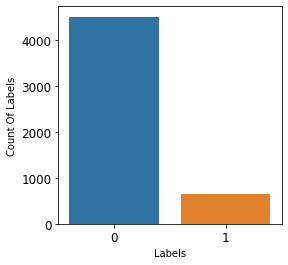

--------------------------------------------------
Count of 0 and 1 is 4516 and 653 respectively.
--------------------------------------------------


In [40]:
label_count = df.label.value_counts()
from numpy.ma.core import size
plt.figure(figsize=(4,4))
ax = sns.countplot('label',data = df)
plt.xticks(size = 12)
plt.xlabel('Labels')
plt.yticks(size = 12)
plt.ylabel('Count Of Labels')
plt.show()
print('-'*50)
print('Count of 0 and 1 is {0} and {1} respectively.'.format(label_count[0],label_count[1]))
print('-'*50)

**From the above plot, we can observe that the target labels are not balanced in our dataset.**

**Create a function to pre-process the text data that performs the following tasks:**

1.   Remove all punctuation
2.   Remove all stopwords
3.   Returns a list of the cleaned text



In [42]:
def preprocess_text(message):
    
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    
    """
    # Check characters to see if they are in punctuation
    # To check punctuations, we will use string.punctuation

    without_punc = [char for char in message if char not in string.punctuation]

    # Join the characters again to form the string.
    without_punc = ''.join(without_punc)
    
    # Now just remove any stopwords and return the list of the cleaned text
    return [word for word in without_punc.split() if word.lower() not in stopwords.words('english')]

**Apply the function "preprocess_text" to the "message" column.**

In [44]:
df['message'].apply(preprocess_text).head(2)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
Name: message, dtype: object

**Visualize the words available in message column for spam messages**

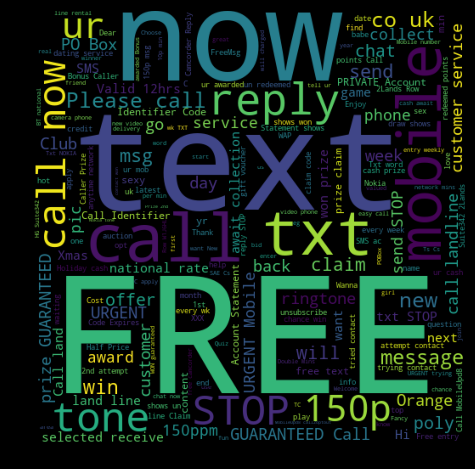

In [45]:
spam_words = ' '.join(list(df[df['label'] == 1]['message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.show()

**Visualize the words available in message column for ham (not spam) messages**

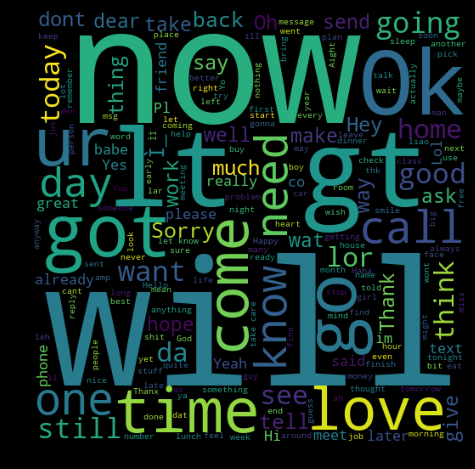

In [46]:
ham_words = ' '.join(list(df[df['label'] == 0]['message']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.show()

**Separate the target column and using CountVectorizer convert the text data to a matrix of token counts**

In [48]:
X = df['message'] #text data
y = df['label'] #target label

# CountVectorizer is used to transform a given text into a vector on the
# basis of the frequency (count) of each word that occurs in the entire text

cv = CountVectorizer() 
X =  cv.fit_transform(X)

**Split the data into train and test set**

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

**Fit the training data into Multinomial Naive Bayes Classifier**

In [50]:
classifier = MultinomialNB().fit(X_train, y_train)

**Check the Classification Report, Accuracy, and Confusion Matrix for training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3631
           1       0.98      0.97      0.97       504

    accuracy                           0.99      4135
   macro avg       0.99      0.98      0.99      4135
weighted avg       0.99      0.99      0.99      4135

--------------------------------------------------
Accuracy :  0.9939540507859734
--------------------------------------------------
Confusion Matrix:



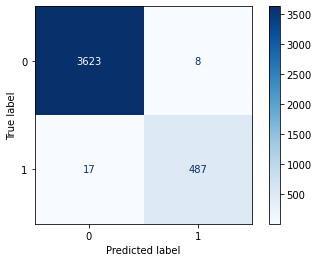

In [51]:
pred_train = classifier.predict(X_train)
print(classification_report(y_train, pred_train))
print('-'*50)
print('Accuracy : ',accuracy_score(y_train, pred_train))
print('-'*50)
print('Confusion Matrix:\n')
plot_confusion_matrix(classifier, X_train, y_train,cmap=plt.cm.Blues);

**Check the Classification Report, Accuracy, and Confusion Matrix for test data**

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       885
           1       0.91      0.93      0.92       149

    accuracy                           0.98      1034
   macro avg       0.95      0.96      0.96      1034
weighted avg       0.98      0.98      0.98      1034

--------------------------------------------------
Accuracy :  0.9777562862669246
--------------------------------------------------
Confusion Matrix:



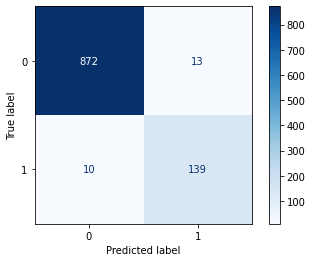

In [52]:
pred_test = classifier.predict(X_test)
print(classification_report(y_test, pred_test))
print('-'*50)
print('Accuracy : ',accuracy_score(y_test, pred_test))
print('-'*50)
print('Confusion Matrix:\n')
plot_confusion_matrix(classifier, X_test, y_test,cmap=plt.cm.Blues);

**Check the first 10 samples of test data**

In [60]:
# print the actual values
print('Actual Labels: {}'.format(y_test.iloc[0:10].values))

# print the predictions
print('Predicted Labels: {}'.format(pred_test[0:10]))

Actual Labels: [0 0 0 0 0 0 0 0 1 1]
Predicted Labels: [0 0 0 0 0 0 0 0 1 1]


The model is able to predict the classes correctly for the first 10 samples.

**Create a function to take input from user and predict the label**

In [61]:
def sms(text):
    # creating a list of labels
    lab = ['not a spam','a spam'] 
    # perform tokenization
    X = cv.transform(text).toarray()
    # predict the text
    p = classifier.predict(X)
    # convert the words in string with the help of list
    s = [str(i) for i in p]
    a = int("".join(s))
    # show out the final result
    res = str("This message is "+ lab[a])
    return res

**Take the data from user and predict its class**

In [63]:
# sample 01
sms(['Hurray! you have won $3000. Get your money using this link.'])

'This message is a spam'

In [64]:
#sample 02
sms(['Hey! I hope everything is fine. Take care!'])

'This message is not a spam'

We can observe that the model is able to predict correct labels for unseen data.

**Note: For running the Tkinter GUI you have to download this notebook in ipynb format and run using jupyter notebook in your local machine/pc because in google colab, you cannot run Tkinter apps.**

In [ ]:
from tkinter import *
import tkinter as tk
gui = Tk()
gui.configure(background= 'light yellow')
gui.title('Spam Detection')
gui.geometry('450x150')

head = Label(gui,text = 'Type Your Message', font=('times',14,'bold'),bg='light yellow')
head.pack()

message = Entry(gui,width=400,borderwidth = 2)
message.pack()
result = Label(gui)
def sms():
    global result
    result.destroy()
    global message
    text = message.get()
    # creating a list of labels
    lab = ['not a spam','a spam'] 
    
    # perform tokenization
    X = cv.transform([text]).toarray()
    
    # predict the text
    p = classifier.predict(X)
    
    # convert the words in string with the help of list
    s = [str(i) for i in p]
    a = int("".join(s))
    
    # show out the final result
    res = str("This message is "+ lab[a])
    #print(text,res)
    result = Label(gui,text=res,font=('times',18,'bold'),fg = 'blue',bg='light yellow')
    result.pack()
    
b = Button(gui,text='Click To Check',font=('times',12,'bold'), fg = 'white',bg ='green',command = sms)
b.pack()

gui.mainloop()